# Lecture 2 - 3

## Shortest path problem by road in NYC

Reference: 

Charpentier, A., Galichon, A., Vernet, L. (2017).  

"Equilibrium for spatial allocation problems on networks"

In [6]:
library("Matrix")
library("gurobi")
library("rgdal")
library("rdist")

In [7]:
load("DataNYC.RData")

Function for shortest path

In [8]:
shortestPath = function(arcs, nodes, originNode, destinationNode) {
    nbNodes = dim(nodes)[1]
    nbArcs = dim(arcs)[1]
    n = rep(0, nbNodes)
    n[c(originNode, destinationNode)] = c(-1, 1)
    Nabla = sparseMatrix(i = 1:nbArcs, j = arcs[, 1], dims = c(nbArcs, nbNodes), 
        x = -1) + sparseMatrix(i = 1:nbArcs, j = arcs[, 2], dims = c(nbArcs, nbNodes), 
        x = 1)
    Phi <- -arcs[, 3]
    
    result = gurobi(list(A = t(Nabla), obj = Phi, modelsense = "max", rhs = n, sense = "=", 
        start = matrix(0, nbArcs, 1)), params = NULL)
    pi = result$x
    distance = -result$objval
    
    cont = TRUE
    i = originNode
    eqpath = which(pi > 0)
    rank = 0
    nodespath = c(0)
    nodespath[rank + 1] = i
    while (cont) {
        rank = rank + 1
        leavingi = which(Nabla[, i] == -1)
        a = intersect(eqpath, leavingi)[1]
        j = which(Nabla[a, ] == 1)[1]
        i = j
        nodespath[rank + 1] = i
        if (j == destinationNode) {
            cont <- FALSE
        }
    }
    
    return(nodespath)
    
    plot(shpNYC)
    points(nodes[nodespath, ], col = "red")
}

Excecute the function

In [10]:
nbNodes

ERROR: Error in eval(expr, envir, enclos): object 'nbNodes' not found


To get coordinates associated with an address:
https://www.gps-coordinates.net/

In [11]:
startlat = 40.70102
startlong = -73.90414
finishlat = 40.7290094
finishlong = -73.9952367

StartGPS = matrix(c(startlong, startlat), ncol = 2)
FinishGPS = matrix(c(finishlong, finishlat), ncol = 2)
StartNAD83 = project(StartGPS, "+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +datum=NAD83 +units=us-ft +no_defs")
FinishNAD83 = project(FinishGPS, "+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +datum=NAD83 +units=us-ft +no_defs")
StartNode = which.min(cdist(StartNAD83, nodes, metric = "euclidean"))
FinishNode = which.min(cdist(FinishNAD83, nodes, metric = "euclidean"))
nodespath = shortestPath(arcs, nodes, StartNode, FinishNode)

Optimize a model with 67316 rows, 169399 columns and 338796 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 17773 rows and 28823 columns
Presolve time: 0.90s
Presolved: 49543 rows, 140576 columns, 281146 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 8.984e+04
 Factor NZ  : 8.256e+05 (roughly 80 MBytes of memory)
 Factor Ops : 1.873e+07 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -4.22816139e+07  3.57483804e+02  5.30e+00 3.84e+03  8.76e+03     1s
   1  -3.80006823e+07 -2.24488020e+03  1.24e-01 2.51e+03  2.13e+03     2s
   2  -2.88697338e+07 -3.02933993e+03  6.99e-03 2.57e+02  3.64e+02     2s
   3  -6.13984474e+06 -5

Plot the result (this will take a while, so don't worry).

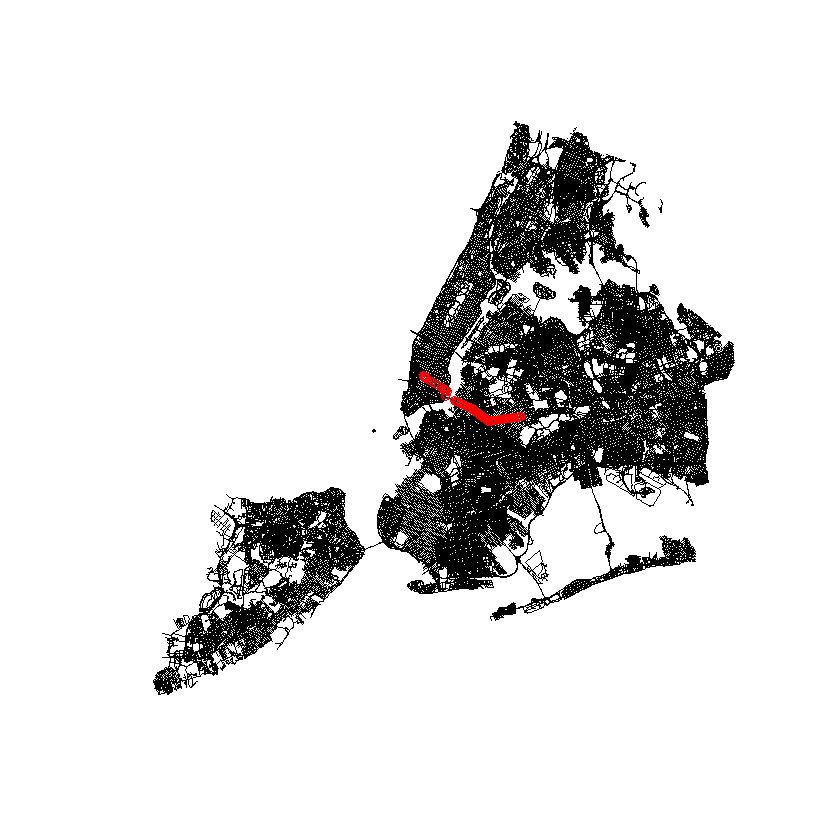

In [12]:
plot(shpNYC)
points(nodes[nodespath, ], col = "red")